In [39]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.append('/noc/users/am8e13/Python/')
from python_functions import *
import cmocean
import random
import calendar
import pickle


In [40]:
grid = grid_read(18)

In [7]:
grid3 = grid_read(36)

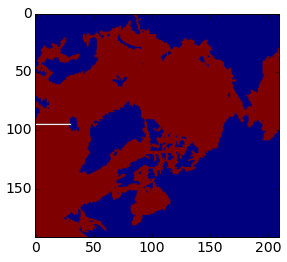

In [68]:
aaaa = np.array(grid3['HFacC'])
aaaa[0,95,0:31] = np.nan

plt.imshow(aaaa[0,:,:])

In [3]:
pert_const = RunRead()
pert_const.getPath('/hpcdata/scratch/am8e13/arctic420x384/experiments/exp_const/results/')

In [4]:
pert_bench = RunRead()
pert_bench.getPath('/hpcdata/scratch/am8e13/arctic420x384/experiments/exp_bench/results/')

In [44]:
def fluxesCalculation_allin(run,times):
    kdic = {36:1,18:2,9:4}
    kk = kdic[run.res]

    file2read = netcdf.NetCDFFile('/scratch/general/am8e13/results'+str(run.res)+'km/grid.nc','r')
    hfacc = file2read.variables['HFacC']
    hfacc = hfacc[:]*1
    drf = file2read.variables['drF']
    drf = drf[:]*1
    rA = file2read.variables['rA']
    rA = rA[:]*1
    dyF = file2read.variables['dyF']
    dyF = dyF[:]*1
    dxF = file2read.variables['dxF']
    dxF = dxF[:]*1
    dydx = np.zeros_like(hfacc)
    for k in range(len(drf)):
        dydx[k,:,:] = drf[k]*rA*hfacc[k,:,:]
    Area_x = dydx/dxF
    Area_y = dydx/dyF
    Area_x[hfacc==0]=np.nan
    Area_y[hfacc==0]=np.nan
    
    coords = {'Fram': [58,80,76,76], 'Fram1' : [55,85,78,78] , 'Fram2' : [60,83,72,72] , \
              'Denmark': [100,100,37,48] , 'Bering' : [80,89,178,178] , 'Davis' : [113,135,75,75] ,\
              'Davis1' : [135,135,52,73] , 'Davis2' : [113,135,75,75],\
             'Norwice' : [50,95,15,15], 'Norwice2' : [60,95,25,25],
              'Scotice1' : [89,89,10,31], 'Scotice2' : [90,90,10,31], 'Scotice3' : [91,91,10,31],
              'Scotice4' : [92,92,10,31],'Scotice5' : [93,93,10,31],'Scotice6' : [94,94,10,31],
              'Scotice7' : [95,95,10,31],} 
    ax_d = {'Fram': 3, 'Fram1' : 3 , 'Fram2' : 3 , 'Denmark': 2 , 'Bering' : 3 , \
            'Davis' : 3 , 'Davis1' : 2 , 'Davis2' : 3, 'Norwice': 3, 'Norwice2' : 3,
            'Scotice1':2,'Scotice2':2,'Scotice3':2,'Scotice4':2,'Scotice5':2,'Scotice6':2,'Scotice7':2}
    vel = {'Fram': 'U', 'Fram1' : 'V' , 'Fram2' : 'V' , 'Denmark': 'U' , \
             'Bering' : 'V' , 'Davis' : 'U' , 'Davis1' : 'U' , 'Davis2' : 'U','Norwice':'V','Norwice2':'V',\
          'Scotice1':'U','Scotice2':'U','Scotice3':'U','Scotice4':'U','Scotice5':'U','Scotice6':'U','Scotice7':'U'}
    
    def coord_calc(coord):
        if coord[0] == coord[1]:
            coord[0] = coord[0]*kk
            coord[1] = coord[0]+1
            coord[2] = coord[2]*kk
            coord[3] = coord[3]*kk
        elif coord[2] == coord[3]:
            coord[0] = coord[0]*kk
            coord[1] = coord[1]*kk
            coord[2] = coord[2]*kk
            coord[3] = coord[2]+1
        return coord

    run.fluxes2 = {}
    file2read = netcdf.NetCDFFile('/scratch/general/am8e13/results18km/grid.nc','r')
    mask = file2read.variables['HFacC']
    mask = mask[:]*1
    mask = np.tile(mask,(len(times),1,1,1))
    
    for var in ['Fram','Fram1','Fram2','Denmark','Bering','Davis','Davis1','Davis2',\
                'Norwice','Norwice2','Scotice1','Scotice2','Scotice3','Scotice4','Scotice5','Scotice6','Scotice7']:
        coord = coords[var]
        coord = coord_calc(coord)
        run.fluxes2[var] = {'Flux' : np.zeros_like(mask[:,:,coord[0]:coord[1],coord[2]:coord[3]]),\
                            'FluxSum' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxInSum' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxOutSum' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxS' : np.zeros_like(mask[:,:,coord[0]:coord[1],coord[2]:coord[3]]),\
                            'FluxSumS' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxT' : np.zeros_like(mask[:,:,coord[0]:coord[1],coord[2]:coord[3]]),\
                            'FluxSumT' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxFW' : np.zeros_like(mask[:,:,coord[0]:coord[1],coord[2]:coord[3]]),\
                            'FluxSumFW' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxFW1' : np.zeros_like(mask[:,:,coord[0]:coord[1],coord[2]:coord[3]]),\
                            'FluxSumFW1' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxOverFlow' : np.zeros_like(mask[:,:,coord[0]:coord[1],coord[2]:coord[3]]),\
                            'FluxSumOverFlow' : np.zeros_like(mask[:,0,0,0]),\
                            'FluxTop' : [], 'FluxMid' : [] , 'FluxBot' : [], \
                            'FluxTopS' : [], 'FluxMidS' : [] , 'FluxBotS' : [], \
                            'FluxTopT' : [], 'FluxMidT' : [] , 'FluxBotT' : []}
        
    S0 = 34.8
    rho0 = 1027.8

    for t,tt in enumerate(times):
        file2read = netcdf.NetCDFFile(run.path+'state.nc','r')
        S = file2read.variables['S']
        S = S[tt]*1
        T = file2read.variables['Temp']
        T = T[tt]*1
        vels = {}
        vels['U'] = file2read.variables['U']
        vels['U'] = vels['U'][tt]*1
        vels['V'] = file2read.variables['V']
        vels['V'] = vels['V'][tt]*1
        
        days = file2read.variables['T']
        days = days[tt]*1
        
        if t == 0:
            years = [0]
            days0 = days
        else:
            years.append((days - days0)/float(60*60*24*360)) 
            
        tmp1 = np.ones_like(mask[:,:,:,:])
        tmp1[:,S>S0] = 0
        
        tmp = np.ones_like(mask[:,:,:,:])
        tmp[:,31:,:,:] = 0
        
        tmpof = np.zeros_like(mask[:,:,:,:])
        tmpof[:,rhop(S,T)>rho0] = 1
        
        for var in ['Fram','Fram1','Fram2','Denmark','Bering','Davis','Davis1','Davis2',\
                    'Norwice','Norwice2','Scotice1','Scotice2','Scotice3','Scotice4','Scotice5','Scotice6','Scotice7']:
            coord = coords[var]
            coord = coord_calc(coord)

            run.fluxes2[var]['Flux'][t,:,:] = (vels[vel[var]][:,coord[0]:coord[1],coord[2]:coord[3]]*\
                    Area_y[:,coord[0]:coord[1],coord[2]:coord[3]]/10**6)
            run.fluxes2[var]['FluxSum'][t] = np.nansum(np.nansum(run.fluxes2[var]['Flux'][t,:,:]))
            run.fluxes2[var]['FluxInSum'][t] = np.nansum(np.nansum(run.fluxes2[var]['Flux'][t,run.fluxes2[var]['Flux'][t,:,:]>0]))
            run.fluxes2[var]['FluxOutSum'][t] = np.nansum(np.nansum(run.fluxes2[var]['Flux'][t,run.fluxes2[var]['Flux'][t,:,:]<0]))
            run.fluxes2[var]['FluxT'][t,:,:] = np.tile(run.fluxes2[var]['Flux'][t,:,:]*\
                                                T[:,coord[0]:coord[1],coord[2]:coord[3]],(1,1,1,1))
            run.fluxes2[var]['FluxSumT'][t] = np.nansum(np.nansum(run.fluxes2[var]['FluxT'][t,:,:]))
            run.fluxes2[var]['FluxS'][t,:,:] = run.fluxes2[var]['Flux'][t,:,:]*\
                                                S[:,coord[0]:coord[1],coord[2]:coord[3]]
            run.fluxes2[var]['FluxSumS'][t] = np.nansum(np.nansum(run.fluxes2[var]['FluxS'][t,:,:])) 
            run.fluxes2[var]['FluxFW'][t,:,:] = run.fluxes2[var]['Flux'][t,:,:]*\
                    (1 - S[:,coord[0]:coord[1],coord[2]:coord[3]]/S0)*tmp[t,:,coord[0]:coord[1],coord[2]:coord[3]]
            run.fluxes2[var]['FluxSumFW'][t] = np.nansum(np.nansum(run.fluxes2[var]['FluxFW'][t,:,:]))                 
            run.fluxes2[var]['FluxFW1'][t,:,:] = run.fluxes2[var]['Flux'][t,:,:]*\
                    (1 - S[:,coord[0]:coord[1],coord[2]:coord[3]]/S0)*tmp1[t,:,coord[0]:coord[1],coord[2]:coord[3]]
            run.fluxes2[var]['FluxSumFW1'][t] = np.nansum(np.nansum(run.fluxes2[var]['FluxFW1'][t,:,:]))   
            run.fluxes2[var]['FluxOverFlow'][t,:,:] = run.fluxes2[var]['Flux'][t,:,:]*tmpof[t,:,coord[0]:coord[1],coord[2]:coord[3]]
            run.fluxes2[var]['FluxSumOverFlow'][t] = np.nansum(np.nansum(run.fluxes2[var]['FluxOverFlow'][t,:,:]))  
            
        if tt % 10 == 0:
            print 'We are at iteration {}'.format(tt)
    
    for var in ['Fram','Fram1','Fram2','Denmark','Bering','Davis','Davis1','Davis2',\
                'Norwice','Norwice2','Scotice1','Scotice2','Scotice3','Scotice4','Scotice5','Scotice6','Scotice7']:
        for flux in ['Flux','FluxT','FluxS','FluxFW','FluxFW1','FluxOverFlow']:
            run.fluxes2[var][flux] = np.squeeze(run.fluxes2[var][flux],axis=ax_d[var])
       
    run.fluxes2['Scotice_ave'] = {}
    for flux in ['FluxSumFW1', 'FluxInSum', 'FluxOverFlow', 'FluxSumFW','FluxSum', 'FluxFW1',
                 'Flux','FluxSumT','FluxS','FluxT','FluxFW','FluxOutSum','FluxSumOverFlow']:
        run.fluxes2['Scotice_ave'][flux] = (run.fluxes2['Scotice1'][flux] + run.fluxes2['Scotice2'][flux] + \
                                            run.fluxes2['Scotice3'][flux] + run.fluxes2['Scotice4'][flux] + \
                                            run.fluxes2['Scotice5'][flux] + run.fluxes2['Scotice6'][flux] + \
                                            run.fluxes2['Scotice7'][flux])/7.
    run.years = np.array(years)

In [73]:
def read_snap(run,time):
    run.snap = []
    file2read = netcdf.NetCDFFile(run.path+'state.nc','r')
    for var in ['S','Temp','V','U']:
        Temp=file2read.variables[var]    
        run.data[var]=Temp[time]*1
    
        print 'read snap for '+var
    
    run.data['T'] = run.data['Temp'] 
    run.data['rhop'] = np.zeros_like(run.data['S'])
    
    for t in range(run.data['S'].shape[0]):
        run.data['T'][t,grid['HFacC'] == 0] = np.nan
        run.data['S'][t,grid['HFacC'] == 0] = np.nan
        run.data['V'][t,grid['HFacC'] == 0] = np.nan
        run.data['U'][t,grid['HFacC'] == 0] = np.nan
        run.data['Temp'][t,grid['HFacC'] == 0] = np.nan
        run.data['rhop'][t,:,:,:] = rhop(run.data['S'][t,:,:,:],run.data['T'][t,:,:,:])
    print 'read snap for rhop'
        
read_snap(pert_const,[1+12*5, 3+12*5, 6+12*5,18+12*5,27+12*5,48+12*5])
read_snap(pert_bench,[1+12*5, 3+12*5, 6+12*5,18+12*5,27+12*5,48+12*5])

pert_const.baroCalc()
pert_bench.baroCalc()

read snap for S
read snap for Temp
read snap for V
read snap for U
read snap for rhop
calc baro
read snap for S
read snap for Temp
read snap for V
read snap for U
read snap for rhop
calc baro


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:319: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:220: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


In [93]:
dpires = 300

In [101]:
def strait_flux_norwice(data_pert,data_diff,times,diff=True):
    ind = 0
    
    variables = ['S','T','U','rhop']
    vartitle = {'S':'psu' , 'T' : r'$^{\circ}$C' , 'U': 'm/s' , 'rhop' : r'$kg/m^3$'}
    verttit = {'S':'Salinity','T':'Temperature','U':'Velocity','rhop':'Density'}
    if diff:
        cmaps = {'S' : cmocean.cm.vort, 'T' : cmocean.cm.vel , 'U' : cmocean.cm.freesurface, \
                 'rhop' : matplotlib.cm.RdBu}    
        vmins = {'S' : -1, 'T' :-4 , 'U' : -0.3 , 'rhop' : -0.5 }
        vmaxs = {'S' : 1, 'T' : 4, 'U' : 0.3 , 'rhop' : 0.5}
        difftitle = 'diff'
    else:
        cmaps = {'S' : cmocean.cm.salinity, 'T' : cmocean.cm.temperature , 'U' : matplotlib.cm.seismic,\
                'rhop' : cmocean.cm.density}
        vmins = {'S' : 34.5, 'T' : 4 , 'U' : -0.5 , 'rhop' : 1026.5}
        vmaxs = {'S' : 35.5, 'T' : 11, 'U' : 0.5, 'rhop' : 1029.5}
        difftitle = ''
    grid = grid_read(data_pert.res)
    
    kres = {36:1,18:2,9:4}
    k = kres[data_pert.res]
    fig, axes = plt.subplots(len(variables)+1,len(times))#,sharex='col', sharey='row')        
    for var in variables:
        for t,tt in zip(times,[0.08,0.25,0.5,1.5,2.25,4.0]):
            cmap = cmaps[var]
            cmap.set_bad('grey') 
            if diff:
                toplot = data_pert.data[var][t,0:36,95*k,0*k:31*k] - data_diff.data[var][t,0:36,95*k,0*k:31*k]
            else:
                toplot = data_pert.data[var][t,0:36,95*k,0*k:31*k]
            imdata = np.ma.masked_invalid(toplot)
            
            CS = axes.flat[ind].pcolormesh(grid['XC'][95*k,0*k:31*k],data_pert.Z[0:36],imdata,
                    vmin=vmins[var],vmax=vmaxs[var],cmap = cmap,)   
            axes.flat[ind].set_title(var+' at '+str(tt)+' yrs',fontsize=16)
            axes.flat[ind].title.set_fontsize('14')
            axes.flat[ind].tick_params(axis='both', which='major', labelsize=14) 
            axes.flat[ind].set_xticks([-18,-15,-12])# 58N 4W 64N, -15W

            if ind%len(times)==0:
                axes.flat[ind].set_ylabel(verttit[var]+'\nDepth (m)',fontsize=16)
            else: 
                axes.flat[ind].get_yaxis().set_visible(False)
            if ind/len(times)-1==2:
                #axes.flat[ind].set_xlabel(r'Lon ($^{\circ}$)',fontsize=16)
                axes.flat[ind].set_xlabel(r'',fontsize=16)
            else:
                axes.flat[ind].get_xaxis().set_visible(False)
            ind += 1
        div = make_axes_locatable(axes.flat[ind-1])
        cax = div.append_axes("right", size="10%", pad=0.05)
        cbar = plt.colorbar(CS, cax=cax, format="%.2g")
        cbar.set_label(vartitle[var], size=16)
        cbar.ax.tick_params(labelsize=14)
        
    lat_ts=90.0 ; lat_0=61.0 ; lon_0=-9.0 ;sgn=1
    width=1600000. ; height=1600000.0
    
    vimin = -20 ; vimax = 20
    kres = {36:1,18:2,9:9}
    kk = kres[data_pert.res]
    cmap=matplotlib.cm.seismic
    
    for t,tt in zip(times,[0.08,0.25,0.5,1.5,2.25,4.0]):
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='black')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='black')
        x,y=m(data_pert.lon,data_pert.lat)
        if diff:
            datam = data_pert.psi[t,0*kk:192*kk,0*kk:210*kk]-data_diff.psi[t,0*kk:192*kk,0*kk:210*kk]
        else:
            datam = data_pert.psi[t,0*kk:192*kk,0*kk:210*kk]
        sitm = np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolormesh(x,y,sitm,cmap=cmap,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(tt)+'yrs',fontsize=16)        
        if ind%len(times)==0:
            axes.flat[ind].set_ylabel('Barotropic\nstreamfunction',fontsize=16)
        ind += 1
    div = make_axes_locatable(axes.flat[ind-1])
    cax = div.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(CS, cax=cax,)
    cbar.set_label('Sv', size=16)
    cbar.ax.tick_params(labelsize=14)
        
    fig.suptitle("Iceland Scotland Ridge "+difftitle+" transect (Ice <---> Sc)",x=1.,y=3.2,fontsize=18)      
    fig.subplots_adjust(right=2.1,top=3.)
    fig.savefig('/noc/users/am8e13/Figures/perturbation_scotice'+difftitle,dpi=dpires, bbox_inches='tight')



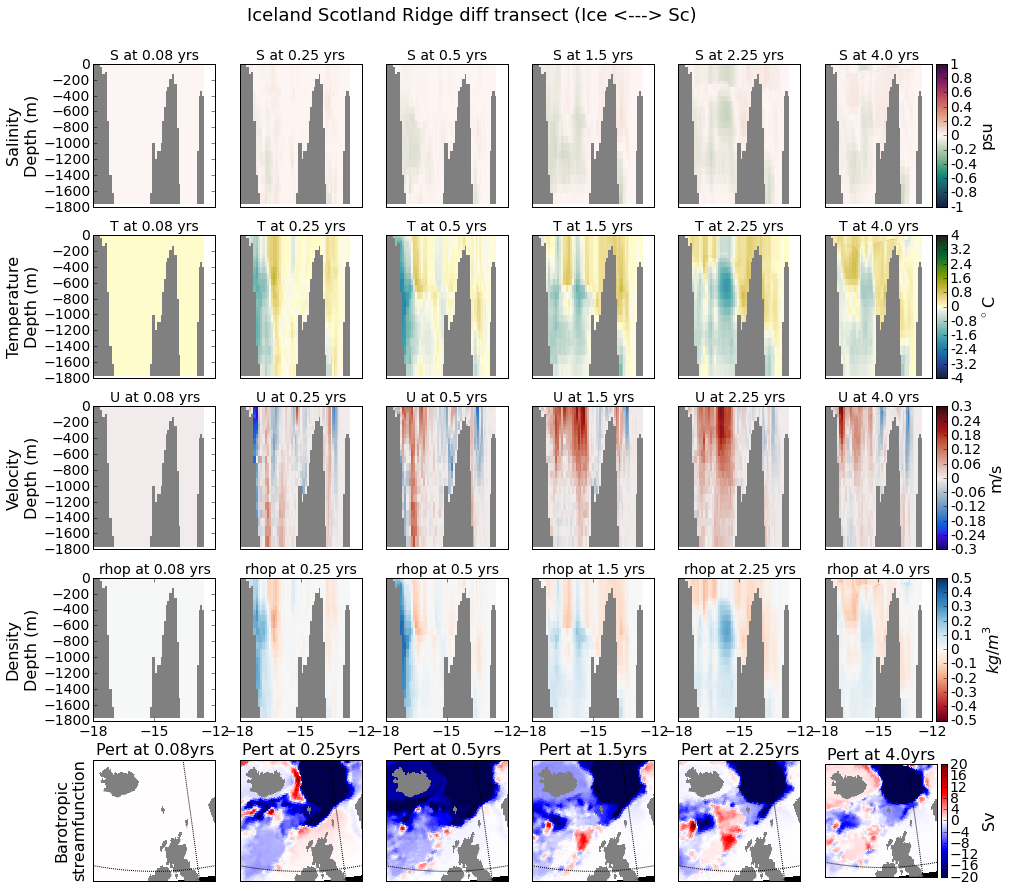

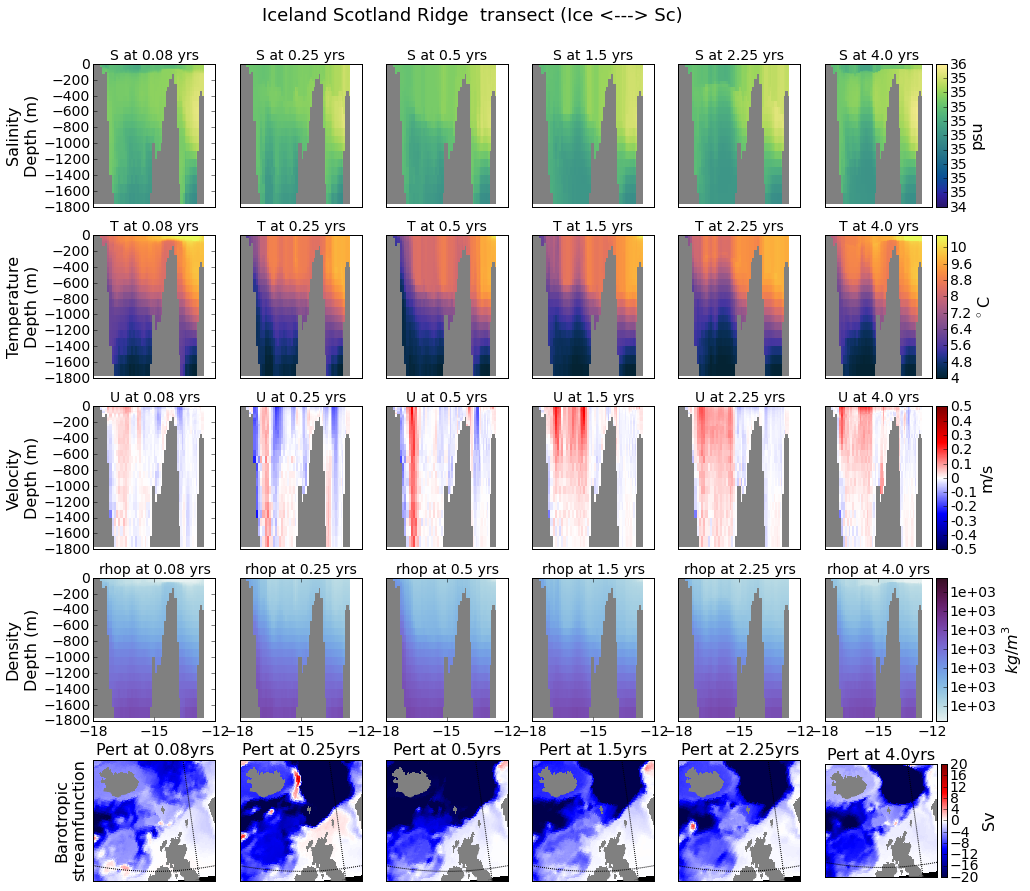

In [102]:
strait_flux_norwice(pert_const,pert_bench,times = [0,1,2,3,4,5],diff=True)
strait_flux_norwice(pert_const,pert_bench,times = [0,1,2,3,4,5],diff=False)

In [6]:
f = open('/scratch/general/am8e13/pert_pickles/pert_const_18')
pert_const= pickle.load(f)
f.close

f = open('/scratch/general/am8e13/pert_pickles/pert_bench_18')
pert_bench= pickle.load(f)
f.close

<function close>

In [42]:
f = open('/scratch/general/am8e13/pert_pickles/pert_const_flux')
pert_const= pickle.load(f)
f.close

f = open('/scratch/general/am8e13/pert_pickles/pert_bench_flux')
pert_bench= pickle.load(f)
f.close

<function close>

In [ ]:
['FluxSumFW1', 'FluxInSum', 'FluxOverFlow', 'FluxMid', 'FluxBotT','FluxSumFW',
'FluxBotS', 'FluxSum','FluxTop', 'FluxFW1','FluxMidS','Flux','FluxMidT','FluxSumS',
'FluxSumT','FluxS','FluxT','FluxTopT','FluxTopS','FluxFW','FluxBot','FluxOutSum','FluxSumOverFlow']

In [29]:
def ave_fluxes(run):
    run.fluxes2['Scotice_ave'] = {}
    fluxes = run.fluxes2['Scotice'].keys()
    for flux in ['FluxSumFW1', 'FluxInSum', 'FluxOverFlow', 'FluxSumFW','FluxSum', 'FluxFW1',
                 'Flux','FluxSumT','FluxS','FluxT','FluxFW','FluxOutSum','FluxSumOverFlow']:
        run.fluxes2['Scotice_ave'][flux] = (run.fluxes2['Scotice'][flux] + run.fluxes2['Scotice1'][flux] + \
                                        run.fluxes2['Scotice2'][flux] + run.fluxes2['Scotice3'][flux])/4.
ave_fluxes(pert_bench)
ave_fluxes(pert_const)

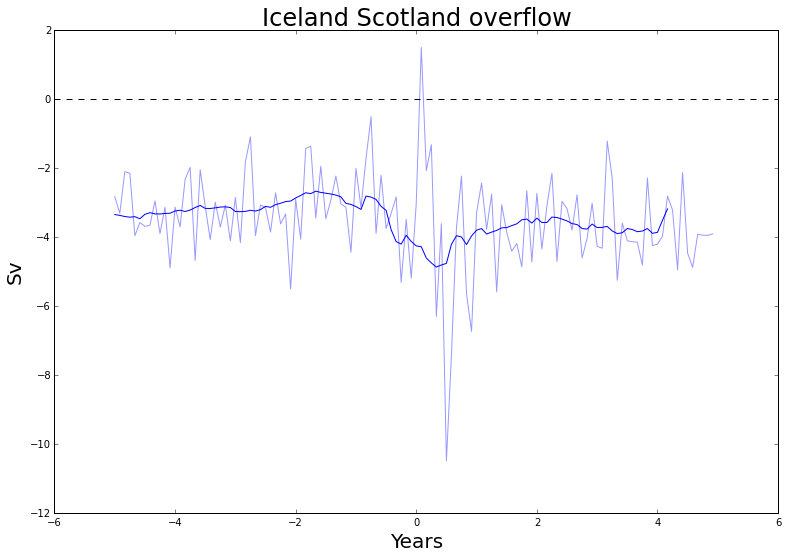

In [62]:
def plot_overflow(run_pert,run_diff):
    kdic = {36:1,18:2,9:4}
    kk = kdic[run_pert.res]
    fig,axes = plt.subplots(1,1)
    for rho0 in [1027.8]:
        for var in ['Flux']:            
            datam = pert_const.fluxes2['Scotice_ave']['FluxSumOverFlow']
            plt.plot(run_pert.years-5,-datam,alpha=0.4,color='b')
            plt.plot(run_pert.years[:-9]-5,-runningMeanFast(datam,12)[:-9],label=rho0,color='b')
            plt.axhline(y=0,color='black',linestyle='--',)
            plt.title('Iceland Scotland overflow',fontsize=24)
            plt.xlabel('Years',fontsize=20)
            plt.ylabel('Sv',fontsize=20)
    fig.subplots_adjust(right=1.8,top=1.8)
    fig.savefig('/noc/users/am8e13/Figures/pert_scotice_overflow',dpi=dpires, bbox_inches='tight')
plot_overflow(pert_const,pert_bench)

In [48]:
# plot layers
def plot_total_flux1(data_pert,data_diff,loc='Scotice',cum=True,row=2,col=2):
    # this function is meant to plot monitor variables   
    ax_ind = 0
    fluxes = ['Flux','FluxFW','FluxT']
    #variables = ['Fram','Barents','Davis','Denmark']
    variables = [loc,loc,loc]
    var_dic = {0:loc,1:loc,2:loc}
    flux_titles = {'FluxFW' : 'FW','FluxFW1' : 'FW<35','FluxS' : 'S', 'FluxT':'Heat', \
                   'FluxIn' : 'Inflow','FluxOut' : 'Outflow' , 'Flux' : 'Net flow'}
    var_titles = {'Fram' : 'Fram' , 'Fram1' : 'Fram' , 'Fram2' : 'Fram' , 
                  'Davis': 'Davis' , 'Davis1': 'Davis' , 'Davis2': 'Davis',
                 'Denmark' : 'Denmark' , 'Bering' : 'Bering' , 'Norwice' : 'Norwice' ,'Norwice2':'Norwice',\
                  'Scotice' : 'Scotl-Ice','Scotice1' : 'Scotl-Ice',\
                  'Scotice2' : 'Scotl-Ice','Scotice3' : 'Scotl-Ice','Scotice_ave' : 'Scotl-Ice',\
                 'Barents' : 'Barents' , 'Barents1' : 'Barents' , 'Barents2' : 'Barents'}
    if cum:
        cumtit = 'cumulative'
        cumtitle = '_cumulative'
    else:
        cumtit = 'per layer'
        cumtitle = '_layer'
    unit = {'FluxFW' : 'Sv' , 'Flux' : 'Sv' , 'FluxT' : 'TW' }
    iniz = 36
    depth = {0:'0-200' , 1 : '200-1600', 2: '1600-3500'}
    fig, axes = plt.subplots(len(fluxes),len(variables),sharex=True,sharey='row')
    for flux in fluxes:
        ind = 0
        for vard in var_dic:
            var = var_dic[vard]
            colormap = matplotlib.cm.jet
            colors = [colormap(i) for i in np.linspace(0, 1,45)]
            if vard  == 0:
                beg = 0
                end = 17
            elif vard == 1:
                beg = 17
                end = 36
            else:
                beg = 36
                end = 44
            for k in range(end,beg,-1):    
                if cum:
                    data = np.nansum(np.nansum((data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux] \
                                               )[:,beg:k,:],axis=2),axis=1)
                else:
                    data = np.nansum((data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux])[:,k,:],axis=1)                
                
                if flux == 'FluxT':
                    data = data*1000*4.202/10**6
                    
                axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-5,runningMeanFast(data,12)[iniz:-1],color=colors[k])
            if cum & (ax_ind != 8):
                data = np.nansum(np.nansum((
                        data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux])[:,beg:end,:],axis=2),axis=1)
                if flux == 'FluxT':
                    data = data*1000*4.202/10**6
                axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-5,runningMeanFast(data,12)
                                   [iniz:-1],color='black',label='Total',lw=2)
            if ax_ind%len(variables)==0:
                axes.flat[ax_ind].set_ylabel(unit[flux],fontsize=16)
            if ax_ind/len(variables)-1==2:
                axes.flat[ax_ind].set_xlabel('Years',fontsize=16)
            axes.flat[ax_ind].set_title(var_titles[var]+' '+flux_titles[flux] +' at '+ depth[vard]+'m',fontsize=16)
            axes.flat[ax_ind].tick_params(axis='both', which='major', labelsize=14)            
            ax_ind += 1

    for k in range(0,44,3):
        ax_ind = 8
        data = np.nansum(np.nansum((
                data_pert.fluxes2[var][flux]-data_diff.fluxes2[var][flux])[:,beg:end,:],axis=2),axis=1)
        if flux == 'FluxT':
            data = data*1000*4.202/10**6
        axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-5,runningMeanFast(data,12)
                                   [iniz:-1],color=colors[k],label=int(data_pert.Z[k]))
    data = np.nansum(np.nansum((
                data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux])[:,beg:end,:],axis=2),axis=1)
    if flux == 'FluxT':
        data = data*1000*4.202/10**6  
    axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-5,runningMeanFast(data,12)
                           [iniz:-1],color='black',label='Total',lw=2)
    plt.legend(bbox_to_anchor=(1.05, 2), loc=6, borderaxespad=0.,fontsize=16)
    
    axes.flat[6].set_xlabel('Years',fontsize=16)
    axes.flat[7].set_xlabel('Years',fontsize=16)
    axes.flat[8].set_xlabel('Years',fontsize=16)
    
    fig.subplots_adjust(right=2.,top=2.)
    fig.suptitle("{} ridge fluxes".format(var_titles[loc]),x=1.1,y=2.2,fontsize=18)  
    fig.savefig('/noc/users/am8e13/Figures/scotice_fluxes'+cumtitle,dpi=dpires, bbox_inches='tight')

#plot_total_flux(pert_const,pert_bench,cum=False)

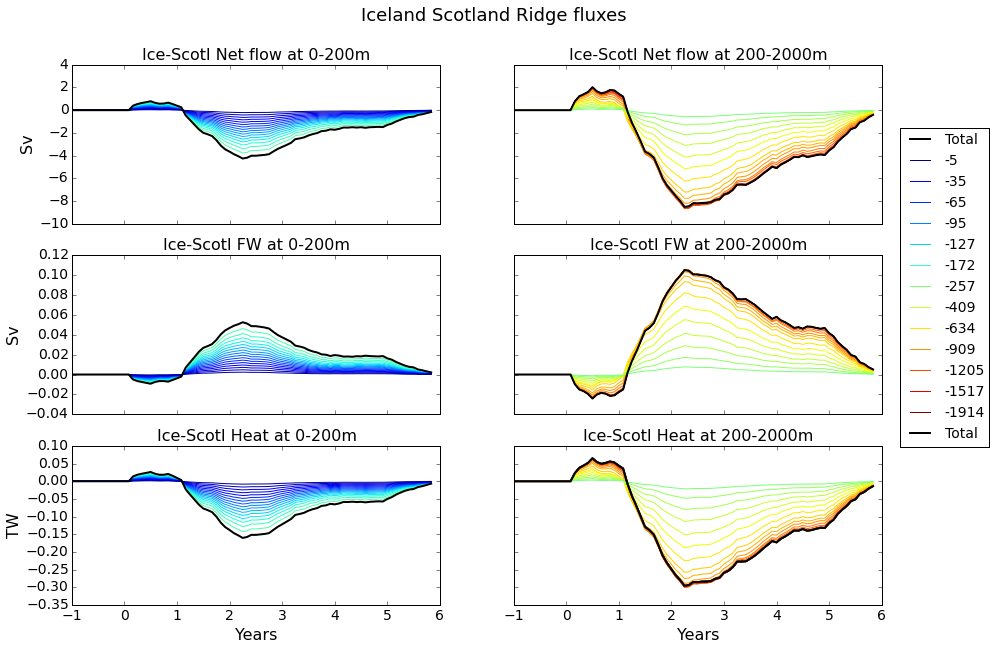

In [67]:
# plot layers
def plot_total_flux1_scotice(data_pert,data_diff,loc='Scotice_ave',cum=True,row=2,col=2):
    # this function is meant to plot monitor variables   
    ax_ind = 0
    fluxes = ['Flux','FluxFW','FluxT']#'FluxOverFlow',
    #variables = ['Fram','Barents','Davis','Denmark']
    variables = [loc,loc]
    var_dic = {0:loc,1:loc}
    flux_titles = {'FluxFW' : 'FW','FluxFW1' : 'FW<35','FluxS' : 'S', 'FluxT':'Heat', \
                   'FluxIn' : 'Inflow','FluxOut' : 'Outflow' , 'Flux' : 'Net flow'}
    var_titles = {'Fram' : 'Fram' , 'Fram1' : 'Fram' , 'Fram2' : 'Fram' , 
                  'Davis': 'Davis' , 'Davis1': 'Davis' , 'Davis2': 'Davis',
                 'Denmark' : 'Denmark' , 'Bering' : 'Bering' , 'Norwice' : 'Norwice' ,'Norwice2':'Norwice',\
                  'Scotice' : 'Scotl-Ice','Scotice1' : 'Scotl-Ice',\
                  'Scotice2' : 'Scotl-Ice','Scotice3' : 'Scotl-Ice','Scotice_ave' : 'Ice-Scotl',\
                 'Barents' : 'Barents' , 'Barents1' : 'Barents' , 'Barents2' : 'Barents'}
    
    if cum:
        cumtit = 'cumulative'
        cumtitle = '_cumulative'
    else:
        cumtit = 'per layer'
        cumtitle = '_layer'
    unit = {'FluxFW' : 'Sv' , 'Flux' : 'Sv' , 'FluxT' : 'TW' }
    iniz = 36
    depth = {0:'0-200' , 1 : '200-2000'}
    fig, axes = plt.subplots(len(fluxes),len(variables),sharex=True,sharey='row')
    for flux in fluxes:
        ind = 0
        for vard in var_dic:
            var = var_dic[vard]
            colormap = matplotlib.cm.jet
            colors = [colormap(i) for i in np.linspace(0, 1,37)]
            if vard  == 0:
                beg = 0
                end = 17
            elif vard == 1:
                beg = 17
                end = 36
            for k in range(end,beg,-1):    
                if cum:
                    data = -np.nansum(np.nansum((data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux] \
                                               )[:,beg:k,:],axis=2),axis=1)
                else:
                    data = -np.nansum((data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux])[:,k,:],axis=1)
                if flux == 'FluxT':
                    data = data*1000*4.202/10**6
                axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-4,runningMeanFast(data,12)[iniz:-1],color=colors[k])
            if cum & (ax_ind != 8):
                data = -np.nansum(np.nansum((
                        data_pert.fluxes2[var][flux] - data_diff.fluxes2[var][flux])[:,beg:end,:],axis=2),axis=1)
                if flux == 'FluxT':
                    data = data*1000*4.202/10**6
                axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-4,runningMeanFast(data,12)
                                   [iniz:-1],color='black',label='Total',lw=2)
            if ax_ind%len(variables)==0:
                axes.flat[ax_ind].set_ylabel(unit[flux],fontsize=16)
            if ax_ind/len(variables)-1==2:
                axes.flat[ax_ind].set_xlabel('Years',fontsize=16)
            axes.flat[ax_ind].set_title(var_titles[var]+' '+flux_titles[flux] +' at '+ depth[vard]+'m',fontsize=16)
            axes.flat[ax_ind].tick_params(axis='both', which='major', labelsize=14)            
            ax_ind += 1

    for k in range(0,37,3):
        ax_ind = 5 
        data = -np.nansum(np.nansum((
                data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux])[:,beg:end,:],axis=2),axis=1)
        if flux == 'FluxT':
            data = data*1000*4.202/10**6        
        axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-4,runningMeanFast(data,12)
                                   [iniz:-1],color=colors[k],label=int(data_pert.Z[k]))
    data = -np.nansum(np.nansum((
                data_pert.fluxes2[var][flux] -  data_diff.fluxes2[var][flux])[:,beg:end,:],axis=2),axis=1)
    if flux == 'FluxT':
        data = data*1000*4.202/10**6       
    axes.flat[ax_ind].plot(data_pert.years[iniz:-1]-4,runningMeanFast(data,12)
                           [iniz:-1],color='black',label='Total',lw=2)
        
    axes.flat[4].set_xlabel('Years',fontsize=16)
    axes.flat[5].set_xlabel('Years',fontsize=16)
    
    plt.legend(bbox_to_anchor=(1.05, 2), loc=6, borderaxespad=0.,fontsize=14)
    fig.subplots_adjust(right=2.,top=2.)
    fig.suptitle("Iceland Scotland Ridge fluxes",x=1.1,y=2.2,fontsize=18)  
    fig.savefig('/noc/users/am8e13/Figures/scotice_fluxes'+cumtitle,dpi=dpires, bbox_inches='tight')

dpires = 300
plot_total_flux1_scotice(pert_const,pert_bench,loc='Scotice_ave')

#plot_total_flux(pert_const,pert_bench,cum=False)

In [49]:
dpires = 300

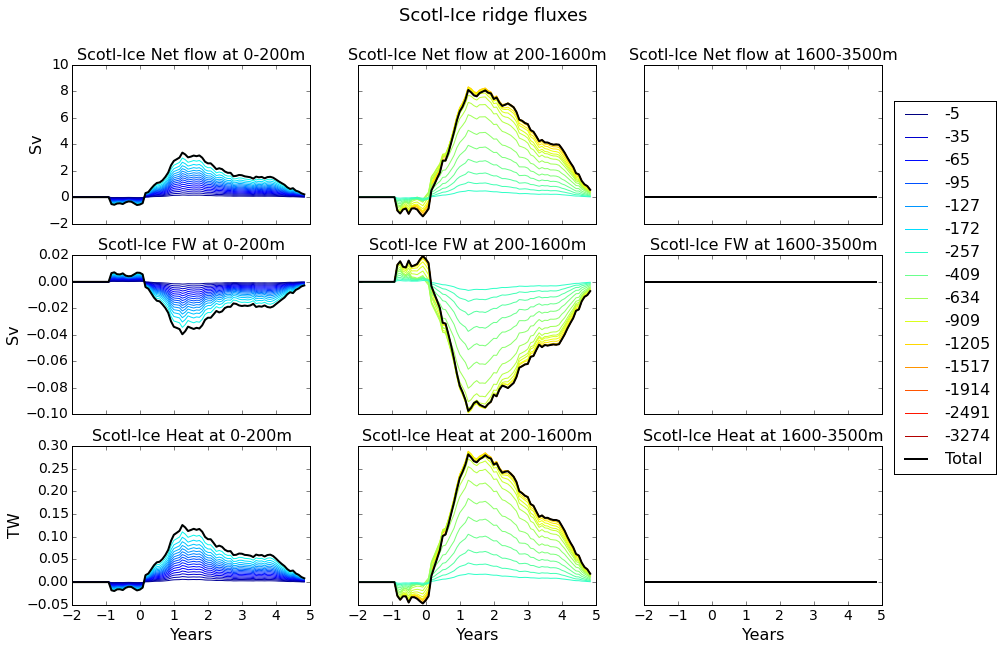

In [50]:
plot_total_flux1(pert_const,pert_bench,loc='Scotice_ave')

In [46]:
fluxesCalculation_allin(pert_const,times = range(0,60,1)+range(61,61+60,1))

We are at iteration 0
We are at iteration 10
We are at iteration 20
We are at iteration 30
We are at iteration 40
We are at iteration 50
We are at iteration 70
We are at iteration 80
We are at iteration 90
We are at iteration 100
We are at iteration 110
We are at iteration 120


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:95: RuntimeWarning: invalid value encountered in greater
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:96: RuntimeWarning: invalid value encountered in less


In [47]:
f = open('/scratch/general/am8e13/pert_pickles/pert_const_flux', 'w')
pickle.dump(pert_const,f)

In [48]:
fluxesCalculation_allin(pert_bench,times = range(0,60,1)+range(61,61+60,1))

We are at iteration 0
We are at iteration 10
We are at iteration 20
We are at iteration 30
We are at iteration 40
We are at iteration 50
We are at iteration 70
We are at iteration 80
We are at iteration 90
We are at iteration 100
We are at iteration 110
We are at iteration 120


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:95: RuntimeWarning: invalid value encountered in greater
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:96: RuntimeWarning: invalid value encountered in less


In [49]:
f = open('/scratch/general/am8e13/pert_pickles/pert_bench_flux', 'w')
pickle.dump(pert_bench,f)

In [50]:
plot_total_flux1(pert_const,pert_bench,loc='Scotice_ave')

NameError: name 'plot_total_flux1' is not defined

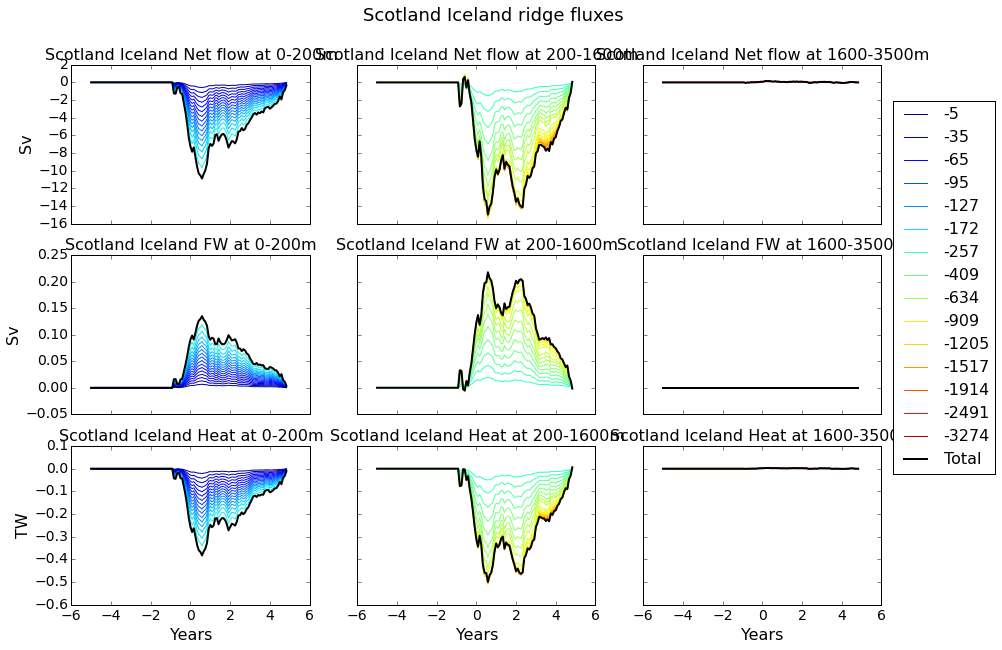

In [11]:
plot_total_flux1(pert_const,pert_bench,loc='Scotice')

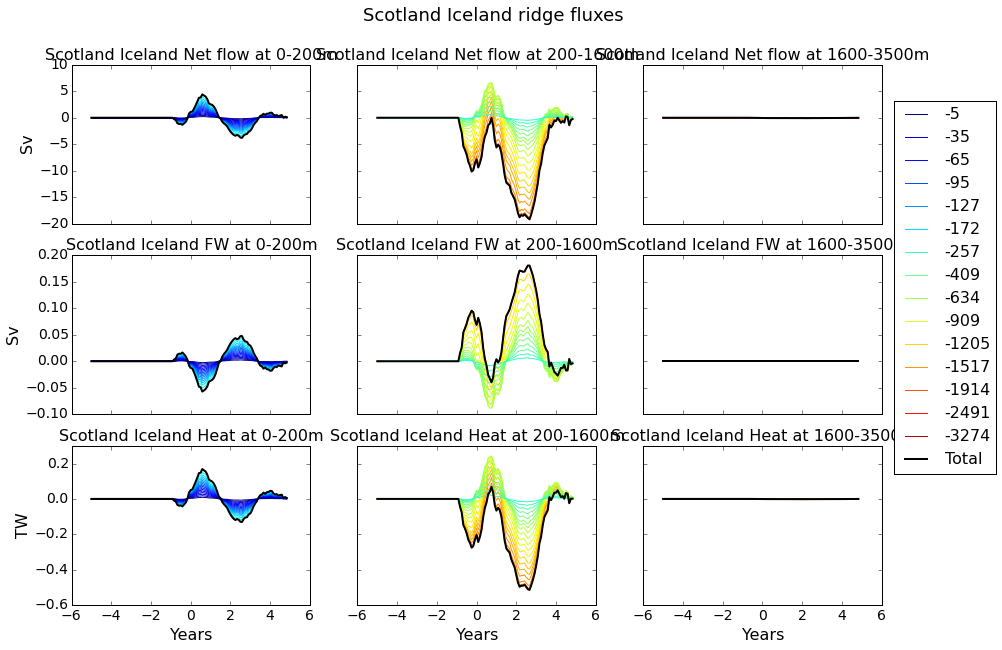

In [12]:
plot_total_flux1(pert_const,pert_bench,loc='Scotice1')

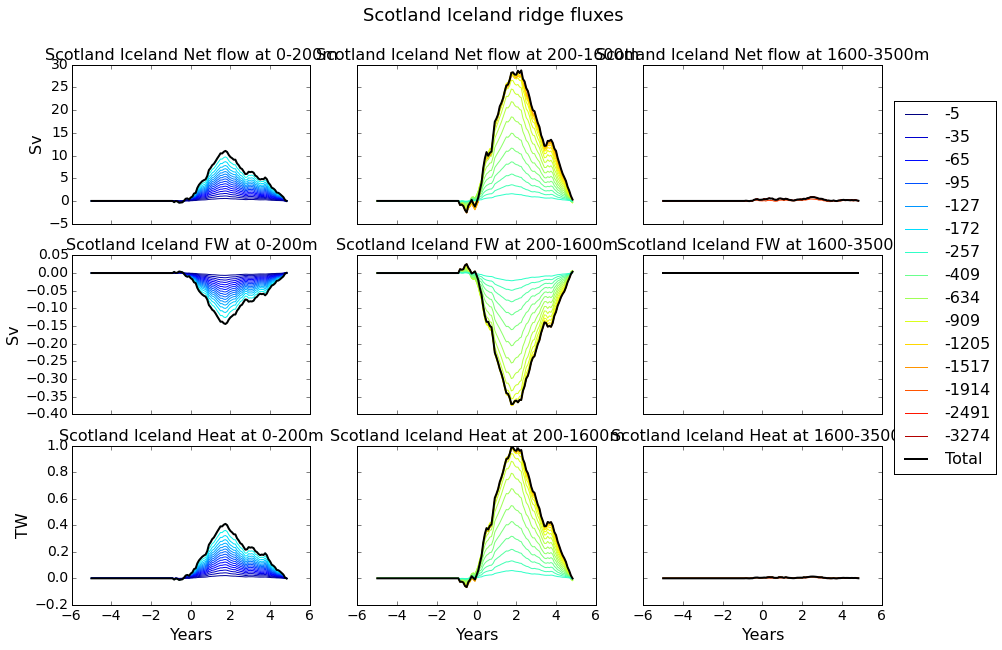

In [13]:
plot_total_flux1(pert_const,pert_bench,loc='Scotice2')

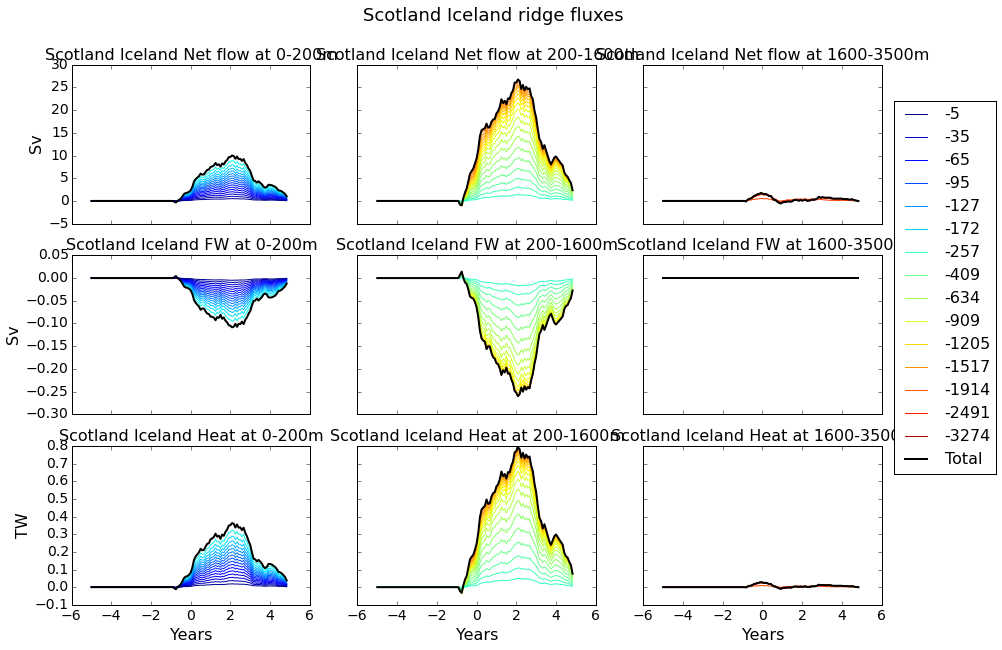

In [14]:
plot_total_flux1(pert_const,pert_bench,loc='Scotice3')

In [4]:
def ave_fluxes(run):
    run.fluxes2['Scotice_ave'] = {}
    for flux in ['FluxSum','FluxSumFW','FluxSumT','Flux','FluxFW','FluxT']:
        run.fluxes2['Scotice_ave'][flux] = (run.fluxes2['Scotice'][flux] + run.fluxes2['Scotice1'][flux] + \
                                        run.fluxes2['Scotice2'][flux] + run.fluxes2['Scotice3'][flux])/4.
ave_fluxes(pert_bench)
ave_fluxes(pert_const)

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


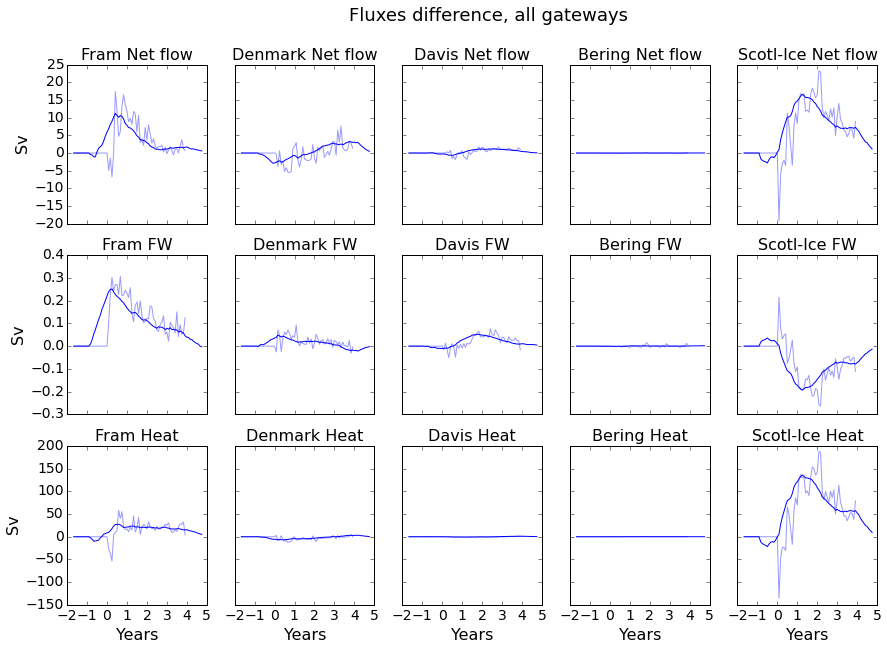

In [68]:
# plot layers
def plot_flux_total_diff(data_pert,data_diff):
    # this function is meant to plot monitor variables   
    ax_ind = 0
    fluxes = ['FluxSum','FluxSumFW','FluxSumT']#'FluxSumFW1',
    variables = ['Fram','Denmark','Davis','Bering','Scotice_ave']#'Norwice','Barents',
    #variables = ['Fram','Denmark']
    flux_titles = {'FluxSumFW' : 'FW','FluxSumFW1' : 'FW<34.8','FluxSumS' : 'S', 'FluxSumT':'Heat', \
                   'FluxInSum' : 'Inflow','FluxOutSum' : 'Outflow' , 'FluxSum' : 'Net flow'}
    var_titles = {'Fram' : 'Fram' , 'Fram1' : 'Fram' , 'Fram2' : 'Fram' , 
                  'Davis': 'Davis' , 'Davis1': 'Davis' , 'Davis2': 'Davis',
                  'Scotice':'Scotl-Ice','Scotice1':'Scotl-Ice','Scotice2':'Scotl-Ice','Scotice3':'Scotl-Ice',
                  'Scotice_ave':'Scotl-Ice',
                 'Denmark' : 'Denmark' , 'Bering' : 'Bering' , 'Norwice' : 'Norwice' ,'Norwice2' : 'Norwice2' ,
                 'Barents' : 'Barents' , 'Barents1' : 'Barents' , 'Barents2' : 'Barents'}
    iniz = 40
    fig, axes = plt.subplots(len(fluxes),len(variables),sharex=True,sharey='row')
    for flux in fluxes:
        for var in variables:  
            if variables == 'Barents':
                data = data_pert.fluxes[var][flux]-data_diff.fluxes[var][flux]
            else:
                data = data_pert.fluxes2[var][flux]-data_diff.fluxes2[var][flux]
            axes.flat[ax_ind].plot(data_pert.years[iniz:-12]-5,data[iniz:-12],alpha=0.4,color='b')
            axes.flat[ax_ind].plot(data_pert.years[iniz:-2]-5,runningMeanFast(data,12)[iniz:-2],color='b')
            axes.flat[ax_ind].set_title(var + flux ,fontsize=16)
            if ax_ind%len(variables)==0:
                axes.flat[ax_ind].set_ylabel('Sv',fontsize=16)
            if ax_ind/len(variables)==2:
                axes.flat[ax_ind].set_xlabel('Years',fontsize=16)
            axes.flat[ax_ind].set_title(var_titles[var]+' '+flux_titles[flux],fontsize=16)
            axes.flat[ax_ind].tick_params(axis='both', which='major', labelsize=14)            
            ax_ind += 1
    plt.legend(bbox_to_anchor=(1.05, 1), loc=6, borderaxespad=0.)
    fig.subplots_adjust(right=2.,top=2.)
    fig.suptitle("Fluxes difference, all gateways",x=1.1,y=2.2,fontsize=18)  
    #fig.savefig('/noc/users/am8e13/Figures/perturbation_flows_allgate',dpi=dpires, bbox_inches='tight')

plot_flux_total_diff(pert_const,pert_bench,)

In [ ]:
ss